### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from scipy.optimize import minimize


### Reading the training and testing dataset files

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')


### Features to keep

In [3]:
kbest_15 = ['longitude', 'sq_feet', 'lease_term_6 months', 'type_Basement', 'type_House',
 'type_Room For Rent', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Ontario',
 'province_Saskatchewan', 'city_Toronto', 'city_Edmonton' ,'city_Winnipeg',
 'city_Regina', 'city_West Vancouver']

kbest_20 = ['longitude','beds', 'sq_feet', 'lease_term_6 months',
 'lease_term_Short Term', 'type_Basement', 'type_House', 'type_Room For Rent',
 'province_Manitoba', 'province_Newfoundland and Labrador',
 'province_Ontario', 'province_Saskatchewan', 'city_Calgary', 'city_Toronto',
 'city_Edmonton', 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver',
 'city_Regina', 'city_West Vancouver']

kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']

corBest_30 = ['baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria']

corBest_15 = corBest_30[0:15]
corBest_20 = corBest_30[0:20]

feat2keep = corBest_30

### Keep only selected features from dataset

In [4]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Customize curve of features

In [5]:
X['baths2'] = - X['baths'] ** 2 - 5 * X['baths']
X['beds2'] = -X['beds']** 2 - 5 * X['beds']
X['latitude'] = np.sin(X['latitude'].round(1))
X['longitude_sin'] = np.sin(X['longitude'].round(1))

# X['baths'] =  np.sin(X['baths'])
# X['beds'] =  np.sin(X['beds'])
# X['latitude'] =  np.sin(X['latitude'])
# X['longitude'] =  np.sin(X['longitude'])
#X['sq_feetsin'] =  np.sin(X['sq_feet'])
X['sq_feet2'] =  X['sq_feet']**2
X['smoking_Smoking Allowed2'] = X['smoking_Smoking Allowed'] ** 2
X.columns

/tmp/ipykernel_520118/3698062423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['baths2'] = - X['baths'] ** 2 - 5 * X['baths']
/tmp/ipykernel_520118/3698062423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['beds2'] = -X['beds']** 2 - 5 * X['beds']
/tmp/ipykernel_520118/3698062423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Index(['baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria', 'baths2', 'beds2', 'longitude_sin', 'sq_feet2',
       'smoking_Smoking Allowed2'],
      dtype='object')

### Split dataset into training and testing set

In [6]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Data scaling

In [7]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Convert to Dataframe and reset index before calling OLS

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_train = pd.DataFrame(y_train, columns=['price']).reset_index(drop=True)

### Train the model on training dataset

In [9]:
#X_transformed = np.log1p(np.exp(X_train_scaled))

# Add a constant
X_train_scaled = sm.add_constant(X_train_scaled)

# Create and fit the model
model = sm.OLS(y_train, X_train_scaled).fit()

### Investigate trend (linear, polynomial, logarithmic, ...)

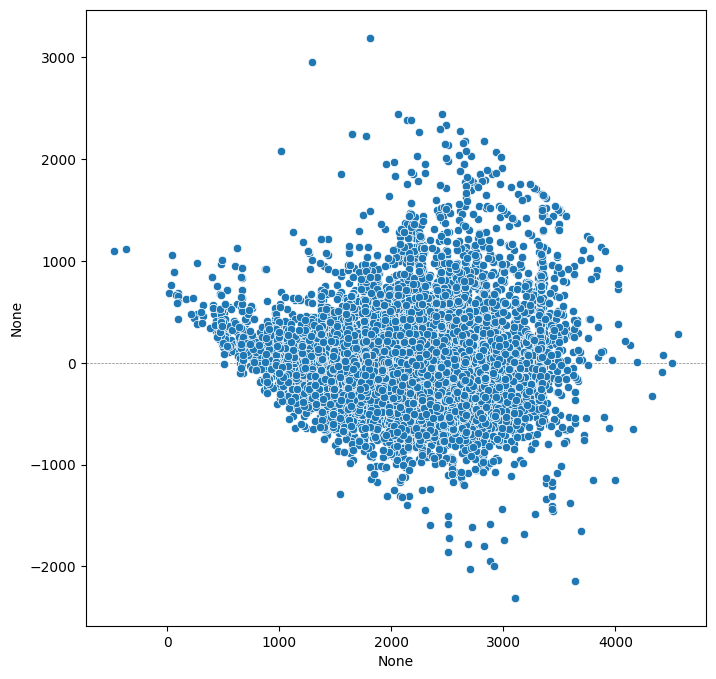

In [10]:
# Residual plot

# Create figure and adjust size
plt.figure(figsize = (8, 8))

# Add scatter plot
ax = sns.scatterplot(x=model.predict(X_train_scaled), y=model.resid, zorder=3)

# Add grid y-axis line at 0
ax.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

In [11]:
# Summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1054.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:11:02   Log-Likelihood:            -1.3196e+05
No. Observations:               17682   AIC:                         2.640e+05
Df Residuals:                   17647   BIC:                         2.643e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2130.3161      3.174    671.234      0.000    2124.095    2136.537
baths                       364.9032     33.802     10.795      0.000     298.647     431.159
beds                        669.3915     20.129     33.255      0.000     629.936     708.847
type_House                   45.9625      4.241     10.837      0.000      37.649      54.275
city_Toronto                216.1618      4.302     50.246      0.000     207.729     224.594
latitude                    133.2593      6.388     20.859      0.000     120.737     145.781
type_Room For Rent         -220.4741      3.792    -58.145      0.000    -227.906    -213.042
province_Ontario            135.5569      7.570     17.907      0.000     120.719     150.395
city_Edmonton               -83.5128      4.080    -20.470      0.000     -91.510     -75.516
type_Basement               -82.4223      3.638    -22.657      0.000     -89.553     -75.292
province_Saskatchewan      -109.3627      4.004    -27.314      0.000    -117.211    -101.515
longitude                    20.7221      9.640      2.150      0.032       1.827      39.617
sq_feet                     177.9242     13.363     13.315      0.000     151.732     204.116
dogs                         51.0632      6.059      8.428      0.000      39.188      62.939
city_Vancouver               80.2591      3.563     22.529      0.000      73.276      87.242
lease_term_Short Term        54.1769      7.094      7.637      0.000      40.271      68.083
province_Manitoba           -44.8631     13.880     -3.232      0.001     -72.070     -17.656
province_British Columbia   107.7390      5.184     20.782      0.000      97.577     117.901
city_Winnipeg                29.1531     13.571      2.148      0.032       2.552      55.754
city_Regina                  18.3462      3.850      4.765      0.000      10.799      25.893
city_West Vancouver          46.4214      3.212     14.453      0.000      40.126      52.717
cats                          1.4993      6.119      0.245      0.806     -10.495      13.494
city_Canmore                 20.0932      3.182      6.314      0.000      13.856      26.331
province_Nova Scotia         36.9852     11.214      3.298      0.001      15.004      58.966
smoking_Smoking Allowed     -10.8017      1.628     -6.637      0.000     -13.992      -7.611
city_Halifax                  9.5454     10.952      0.872      0.383     -11.921      31.012
type_Duplex                 -19.0418      3.413     -5.580      0.000     -25.731     -12.353
lease_term_Negotiable        30.1734     13.548      2.227      0.026       3.618      56.729
type_Condo Unit              46.6716      3.754     12.433      0.000      39.314      54.029
lease_term_Long Term        -10.7124     14.814     -0.723      0.470     -

In [12]:
sm.stats.stattools.durbin_watson(model.resid)

np.float64(1.9820143838532893)

Text(0.5, 1.0, 'QQ plot')

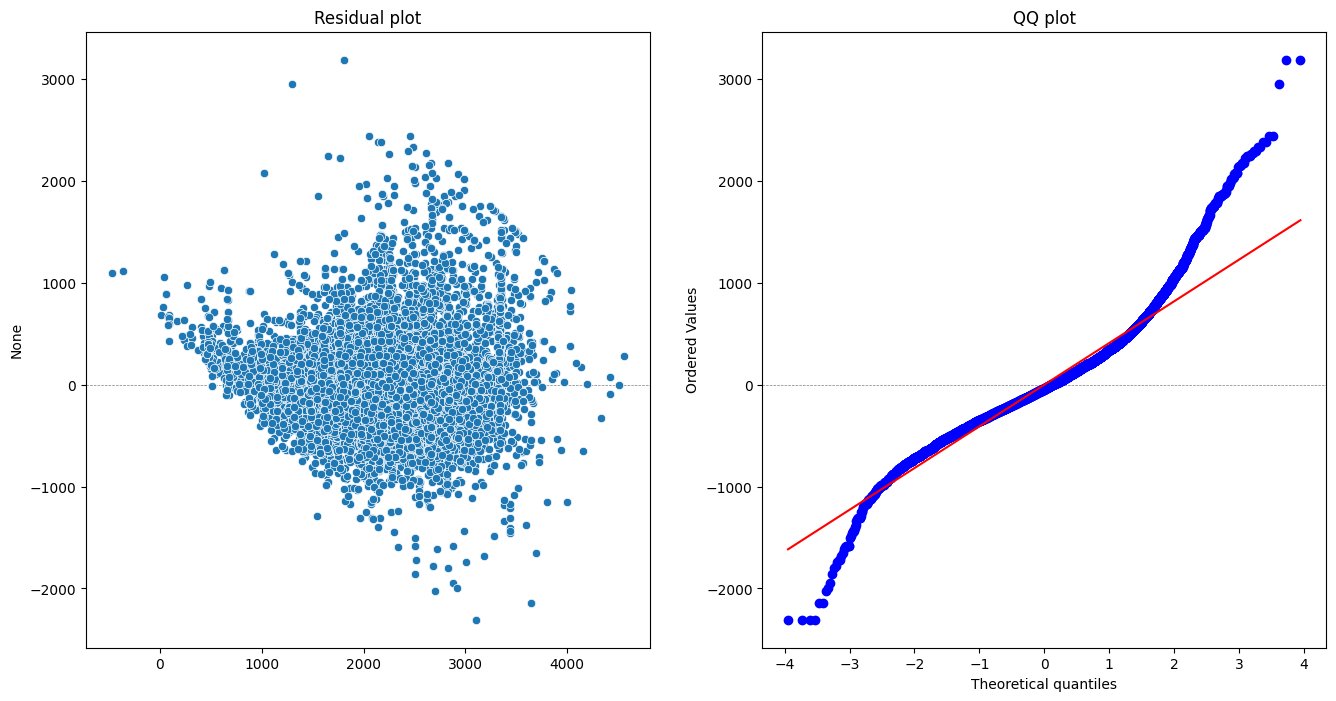

In [13]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=model.predict(), y=model.resid, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(model.resid, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

### Validation on testing dataset

In [14]:
# Define X and y
#X = X_test_scaled #pd.concat([X_train_scaled,X_test_scaled])

# Add a constant
#X_test_scaled = sm.add_constant(X_test_scaled)
X_test_scaled['const'] = 1.

first = X_test_scaled.pop('const')

X_test_scaled.insert(0, 'const', first) 

y_pred = model.predict(X_test_scaled)
print(f"Predictions: {y_pred}")
#X_test_scaled

Predictions: 0       2810.940001
1       1393.128026
2       1997.610455
3       2084.254810
4       1941.771070
           ...     
4416    2553.399327
4417    2386.098705
4418    1838.872727
4419    2510.453534
4420    2649.653412
Length: 4421, dtype: float64


In [15]:
#sm.add_constant(X_test_scaled)

<Axes: xlabel='price', ylabel='None'>

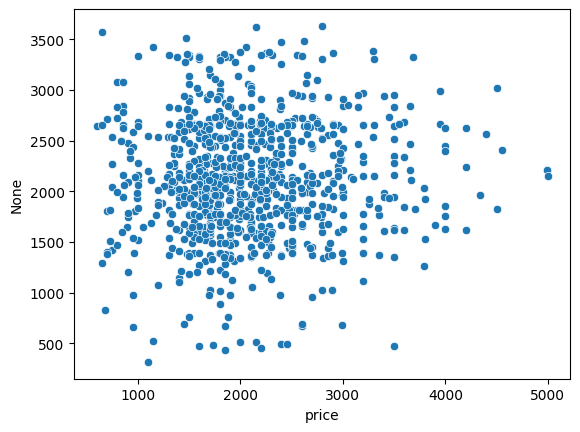

In [16]:
# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3)


In [17]:
# Training dataset
y_pred_train = model.predict(X_train_scaled)

mae = mean_absolute_error(y_train, y_pred_train)

mse = mean_squared_error(y_train, y_pred_train)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, pd.DataFrame(y_pred, columns=['price']))

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 304
The Mean Square Error = 177751
The Root Mean Square Error = 422
The R2 scores = 1


In [22]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.2f}\n\
The R2 scores = {r2:.2f}')

The Mean Absolute Error = 299
The Mean Square Error = 172231
The Root Mean Square Error = 415.01
The R2 scores = 0.67



| Regression Method   | Predictors  | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ----------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | SelectKBest (15) | 407                | 309293             | 556                   | 1           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 1           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 1           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 1           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 1           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 1           |
| Polynomial          | SelectKBest (15) | 319                | 197348             | 444                   | 1           |
|                     | Highest corr (15)| 278                | 150742             | 388                   | 1           |
|                     | SelectKBest (20) | 302                | 176505             | 420                   | 1           |
|                     | Highest corr (20)| 274                | 147937             | 385                   | 1           |
|                     | SelectKBest (30) | 263                | 134968             | 367                   | 1           |
|                     | Highest corr (30)| 266                | 138808             | 373                   | 1           |
| Ordinary Least Square | SelectKBest (15) | 407                | 309293             | 556                   | 1           |
|                       | SelectKBest (15) + sq_ft^2 + sin(longitude) | 371                | 261830             | 512                   | 1           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 1           |
|                     | Highest corr (15) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds²| 316                | 190964             | 437                   | 1           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 1           |
|                     |SelectKBest (15) + sq_ft^2 + sin(longitude) + bath² | 336                | 213294             | 462                   | 1           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 1           |
|                     | Highest corr (15) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds²| 308                | 180525             | 425                   | 1           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 1           |
|                     |SelectKBest (15) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds² + smoking² | 298                | 171348             | 414                   | 1           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 1           |
|                     | Highest corr (30) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds² + smoking²| 299                | 172231             | 415                   | 0.67           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.


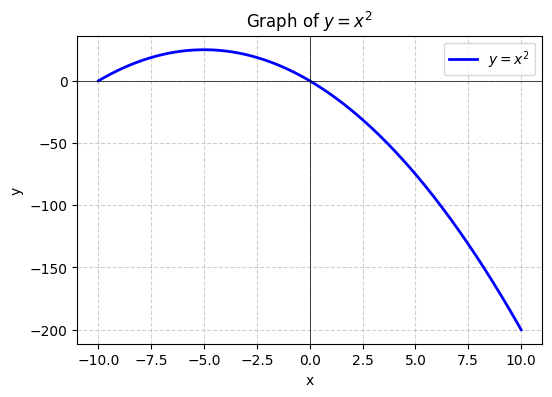

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
x = np.linspace(-10, 10, 400)  # Creates 400 points from -10 to 10
y = -x**2 - 10*x # Compute y = x^2

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$y = x^2$', color='b', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^2$')
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.legend()
plt.show()

/tmp/ipykernel_520118/2742636065.py:6: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x) # Compute y = x^2


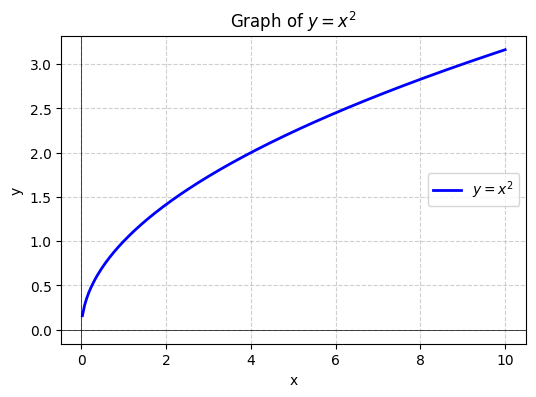

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
x = np.linspace(-10, 10, 400)  # Creates 400 points from -10 to 10
y = np.sqrt(x) # Compute y = x^2

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$y = x^2$', color='b', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = x^2$')
plt.axhline(0, color='black', linewidth=0.5)  # X-axis
plt.axvline(0, color='black', linewidth=0.5)  # Y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid
plt.legend()
plt.show()

In [21]:
# Define independent (X) and dependent (Y) variables
X = X['beds'] ** 2
X = sm.add_constant(X)  # Add intercept term 

# Fit OLS Model
model = sm.OLS(y, X).fit()

# Extract coefficients
intercept, slope = model.params
equation = f"y = {intercept:.4f} + {slope:.4f}x"

print("Equation of best-fit line:", equation)

ValueError: endog and exog matrices are different sizes

In [ ]:
X_ = X['baths'] 
X_lin = sm.add_constant(X_)
model_lin = sm.OLS(y, X_lin).fit()
r2_lin = model_lin.rsquared
eq_lin = f"y = {model_lin.params[0]:.4f} + {model_lin.params[1]:.4f}x"
# Polynomial Fit (Quadratic)

X_poly = np.column_stack((X_**2, X_))  # X² and X
X_poly = sm.add_constant(X_poly)
model_poly = sm.OLS(y, X_poly).fit()
r2_poly = model_poly.rsquared
eq_poly = f"y = {model_poly.params[0]:.4f} + {model_poly.params[1]:.4f}x² + {model_poly.params[2]:.4f}x"

# Logarithmic Fit
#X_log = sm.add_constant(np.log(X))
#model_log = sm.OLS(y, X_log).fit()
#r2_log = model_log.rsquared
#eq_log = f"y = {model_log.params[0]:.4f} + {model_log.params[1]:.4f}ln(x)"

# sin Fit
X_sin = sm.add_constant(np.sin(X))
model_sin = sm.OLS(y, X_sin).fit()
r2_sin = model_sin.rsquared
eq_sin = f"y = {model_sin.params[0]:.4f} + {model_sin.params[1]:.4f}sin(x)"

# Compare R² values
print(f"Linear: R² = {r2_lin:.4f}, Equation: {eq_lin}")
print(f"Polynomial: R² = {r2_poly:.4f}, Equation: {eq_poly}")
#print(f"Logarithmic: R² = {r2_log:.4f}, Equation: {eq_log}")
print(f"Sin: R² = {r2_sin:.4f}, Equation: {eq_sin}")

# Best Fit Selection
best_fit = max((r2_lin, "Linear"), (r2_poly, "Polynomial"), (r2_sin, "sin")) #, (r2_log, "Logarithmic"))
print(f"\nBest fit: {best_fit[1]} with R² = {best_fit[0]:.4f}")